In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_regression
num_features = 6
X, y = make_regression(n_samples=1000, n_features=num_features, n_informative=3, noise=13, random_state=56)

data = pd.DataFrame(X, columns = [f"Feature{i+1}" for i in range(num_features)])
data['Target'] = y

data.to_csv('regression.csv', index=False)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model_1.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model_1.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

train_loss = model_1.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на навчальних даних:", train_loss)
test_loss = model_1.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних:", test_loss)

Epoch 1/200
25/25 [==============================] - 1s 7ms/step - loss: 118.1680 - mae: 118.1680 - val_loss: 108.1906 - val_mae: 108.1906
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 117.5770 - mae: 117.5770 - val_loss: 107.4666 - val_mae: 107.4666
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 116.4321 - mae: 116.4321 - val_loss: 106.0219 - val_mae: 106.0219
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 114.3507 - mae: 114.3507 - val_loss: 103.3706 - val_mae: 103.3706
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 110.7491 - mae: 110.7491 - val_loss: 99.0096 - val_mae: 99.0096
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 105.0525 - mae: 105.0525 - val_loss: 92.2015 - val_mae: 92.2015
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 96.4437 - mae: 96.4437 - val_loss: 82.1800 - val_mae: 82.1800
Epoch 8/200
25/25 [================

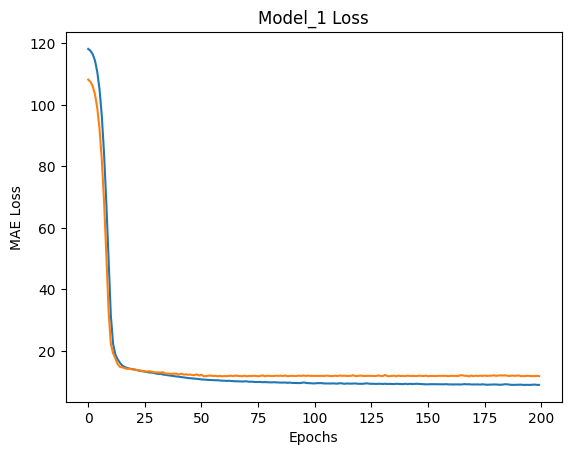

7/7 [==============================] - 0s 1ms/step


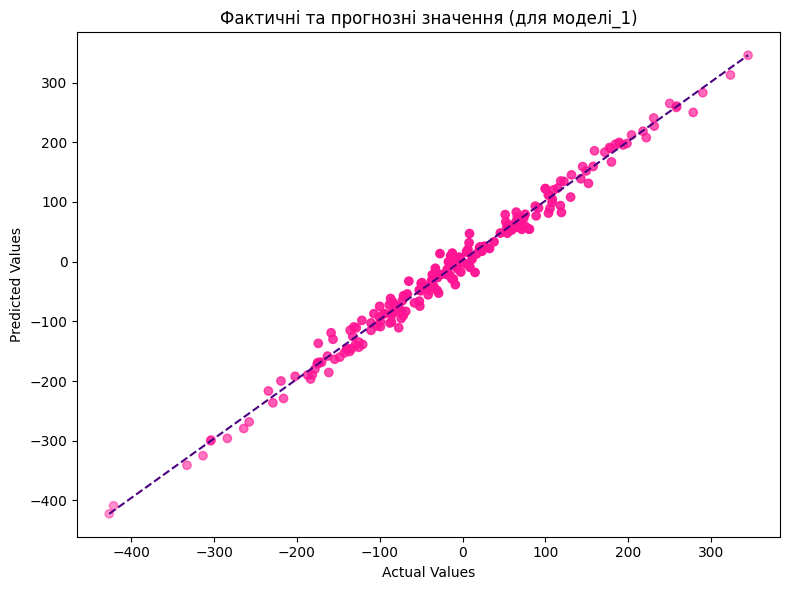

In [8]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Model_1 Loss')
plt.show()

y_pred_1 = model_1.predict(X_test)
plt.figure(figsize=(8, 6))
distance = np.abs(y_test - y_pred_1) 
max_distance = np.max(distance)
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)
    plt.scatter(y_test[i], y_pred_1[i], c='deeppink', alpha=alpha)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_pred_1), max(y_pred_1)], ls='--', c ='indigo')
plt.title('Фактичні та прогнозні значення (для моделі_1)')
plt.tight_layout()
plt.show()

Epoch 1/300
25/25 [==============================] - 1s 7ms/step - loss: 79.5733 - mae: 79.5733 - val_loss: 40.0049 - val_mae: 40.0049
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 22.7335 - mae: 22.7335 - val_loss: 18.4913 - val_mae: 18.4913
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 14.3355 - mae: 14.3355 - val_loss: 12.5359 - val_mae: 12.5359
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 14.6177 - mae: 14.6177 - val_loss: 14.2408 - val_mae: 14.2408
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 12.7569 - mae: 12.7569 - val_loss: 13.3506 - val_mae: 13.3506
Epoch 6/300
25/25 [==============================] - 0s 4ms/step - loss: 13.9554 - mae: 13.9554 - val_loss: 13.0074 - val_mae: 13.0074
Epoch 7/300
25/25 [==============================] - 0s 3ms/step - loss: 12.4344 - mae: 12.4344 - val_loss: 13.6159 - val_mae: 13.6159
Epoch 8/300
25/25 [==============================] - 0s

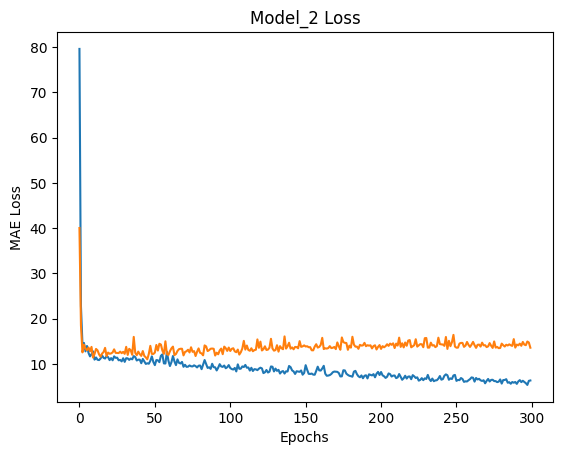

7/7 [==============================] - 0s 1ms/step


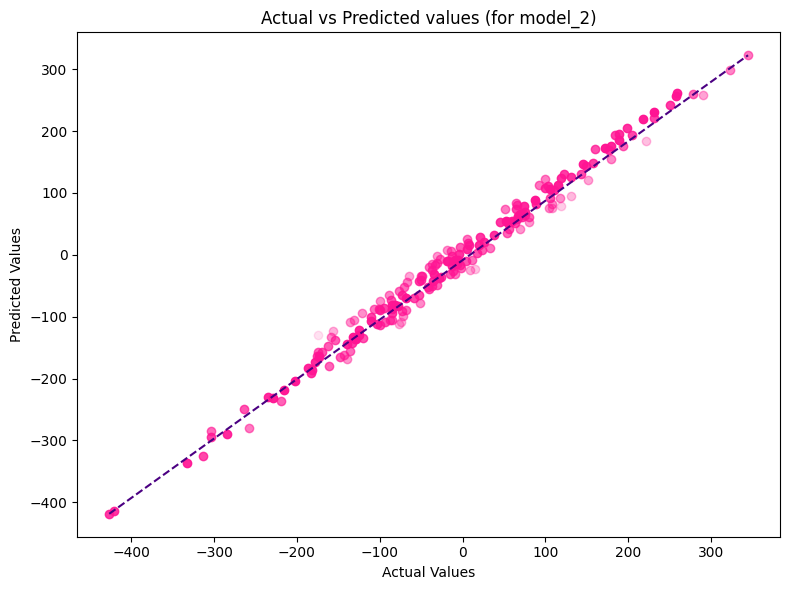

NameError: name 'model_mae_1' is not defined

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('regression.csv')
X = data.drop('Target', axis=1)
y = data['Target']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#Neural network model with 4 layers
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

#Compile and train the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae', metrics=['mae'])
history = model_2.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

#Evaluate the model on the train data and test data
train_loss = model_2.evaluate(X_train, y_train, verbose=0)
print("\nTraining Loss (MAE) on Training Data:", train_loss)
test_loss = model_2.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MAE) on Test Data:", test_loss)

#Visualization of learning results
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Model_2 Loss')
plt.show()

#Visualization of the real and predicted values
y_pred_2 = model_2.predict(X_test)
plt.figure(figsize=(8, 6))
y_test = y_test.ravel()
y_pred_2 = y_pred_2.ravel()
distance = np.abs(y_test - y_pred_2) 
max_distance = np.max(distance)

for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)  #Transparency depending on the distance
    plt.scatter(y_test[i], y_pred_2[i], c='deeppink', alpha=alpha)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_pred_2), max(y_pred_2)], ls='--', c ='indigo')
plt.title('Actual vs Predicted values (for model_2)')
plt.tight_layout()
plt.show()